In [1]:
import numpy as np
import pandas as pd
from sklearn import svm, metrics,preprocessing
from sklearn.metrics import classification_report
#from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
# import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

In [2]:
### sultan-gpu-pc
path="/home/sultan/EEG_CP/WAVELET_SPECTROGRAM/Features_data/Evoked_100sam_all.csv"
#sultan localpc
# path="C:/Users/mmahmud/Documents/CP_ALL_DATA/Final_Features_induced_evoked/Evoked_100sam_all.csv"
# path="C:/Users/sultan/Documents/CP_ALL_DATA/Final_Features_induced_evoked/CP_Ind_evk_final_data_with_labels/Evoked_100_Tk153_ex_16_25_localpc.csv"
dataset1 =pd.read_csv(path)

In [3]:
# an=np.arange(0,100,2)
# bn=np.arange(100,202,2)
# rndr=np.concatenate([an,bn])
# # dataset2=dataset1.drop([60,61,62,63,232,233],axis=0)
# dataset2=dataset1.drop([61,63,232,233],axis=0)
# # dataset=dataset1.drop(range(0,10),axis=0)
# dataset=dataset2.drop(rndr,axis=0)

In [4]:
# an=np.arange(0,100,2)
# bn=np.arange(100,198,2)
# rndr=np.concatenate([an,bn])
# len(rndr)

### HPC format

In [5]:
dataset=dataset1
Xc=dataset.iloc[:,3:].values
y=dataset.iloc[:,2].values
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(Xc)

## Local pc format

In [6]:
# dataset=dataset1
# Xc=dataset.iloc[:,2:].values
# y=dataset.iloc[:,1].values
# scaler = preprocessing.StandardScaler()
# X = scaler.fit_transform(Xc)

In [7]:
# y.shape
y

array([1., 1., 1., ..., 0., 0., 0.])

In [8]:
rs=21

In [9]:
np.unique(y,return_counts=True)

(array([0., 1.]), array([1440, 1440]))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=rs) 

In [11]:
X_test.shape, y_test.shape

((576, 272), (576,))

In [12]:
np.unique(y_test)
np.unique(y_test,return_counts=True)

(array([0., 1.]), array([292, 284]))

# Grid search

In [13]:
# cv=5
# from sklearn.model_selection import GridSearchCV
# # parameters = {'kernel':['rbf'], 'C':[1, 6.5, 10,20,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
# parameters = {'kernel':['rbf'], 'C':[1, 6.5, 10,20,100,1000],'gamma':[0.01,0.002,0.00069,0.0007,0.0005]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)

In [14]:
# cv=5
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[0.90,1.00,1.25],'gamma':[3.0,3.25,3.25 ]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)

In [15]:
# # Average Scores
# #  print clf.cv_results_
# # clf.best_estimator_
# # np.mean
# scores=clf.cv_results_['mean_test_score']
# print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))

In [16]:
# clf.best_estimator_

### Whole brain accuracy and AUC

In [17]:
# whc=pd.DataFrame([acc,roc_auc])
# whc

In [18]:
# cv=5
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1],'gamma':[0.01 ]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)

In [19]:
k=0;j=68; acgw=[];
for i in range(0,4):
    cv=5
    from sklearn.model_selection import GridSearchCV
#     parameters = {'kernel':['rbf'], 'C':[10],'gamma':[0.01]}
    parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.01,0.0147, 0.016, 0.019, 0.021, 2/1428.0,1/1428.0]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgw=np.append(acgw,acc)
    scores=clf.cv_results_['mean_test_score']
    print("Accuracy:%0.4f (+/-%0.4f)" %(scores.mean(), scores.std()))
    print (acc)
    print (k,j)
    print(classification_report(y_test, pred))
#     Sve=float(len(clf.best_estimator_.support_vectors_)/X_train.shape[0])
#     print('Support:',Sve)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('AUC:',roc_auc)
    k=k+68;j=j+68;

Accuracy:0.6225 (+/-0.0204)
0.6753472222222222
(0, 68)
             precision    recall  f1-score   support

        0.0       0.70      0.63      0.66       292
        1.0       0.66      0.72      0.69       284

avg / total       0.68      0.68      0.67       576

('AUC:', 0.6759357514952731)
Accuracy:0.6413 (+/-0.0177)
0.6788194444444444
(68, 136)
             precision    recall  f1-score   support

        0.0       0.70      0.65      0.67       292
        1.0       0.66      0.71      0.68       284

avg / total       0.68      0.68      0.68       576

('AUC:', 0.6792157051900444)
Accuracy:0.6196 (+/-0.0149)
0.6961805555555556
(136, 204)
             precision    recall  f1-score   support

        0.0       0.71      0.68      0.69       292
        1.0       0.68      0.71      0.70       284

avg / total       0.70      0.70      0.70       576

('AUC:', 0.6964354620875941)
Accuracy:0.6120 (+/-0.0161)
0.6666666666666666
(204, 272)
             precision    recall  f1-sco

In [20]:
###This is the for last data only
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
# roc_auc_rh = auc(false_positive_rate, true_positive_rate)
# roc_auc_rh

In [21]:
clf.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.000700280112045,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [22]:
yr=X_test[:,0:68]
yr.shape

(576, 68)

# Hemisphere

### LH

In [23]:
rs=17
b=range(0,(X.shape[1]),2)
d22=X[:,b];
X_train, X_test, y_train, y_test = train_test_split(d22,y, test_size=.20, random_state=rs) 
k=0;j=34; acgl=[];
for i in range(0,4):
    cv=5
    from sklearn.model_selection import GridSearchCV
#     parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
    parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,0.035]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgl=np.append(acgl,acc)
    scores=clf.cv_results_['mean_test_score']
#     print scores
    print("Accuracy:%0.4f (+/-%0.4f)" %(scores.mean(), scores.std()))
    print (acc)
    print (k,j)
    print(classification_report(y_test, pred))
#     Sve=float(len(clf.best_estimator_.support_vectors_)/X_train.shape[0])
#     print('Support:',Sve)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('AUC:',roc_auc)
    k=k+34;j=j+34;

Accuracy:0.6013 (+/-0.0130)
0.6458333333333334
(0, 34)
             precision    recall  f1-score   support

        0.0       0.62      0.65      0.63       271
        1.0       0.67      0.65      0.66       305

avg / total       0.65      0.65      0.65       576

('AUC:', 0.6458290484544189)
Accuracy:0.6028 (+/-0.0139)
0.6319444444444444
(34, 68)
             precision    recall  f1-score   support

        0.0       0.60      0.63      0.62       271
        1.0       0.66      0.63      0.64       305

avg / total       0.63      0.63      0.63       576

('AUC:', 0.6320972717923901)
Accuracy:0.5748 (+/-0.0146)
0.6475694444444444
(68, 102)
             precision    recall  f1-score   support

        0.0       0.61      0.69      0.65       271
        1.0       0.69      0.61      0.65       305

avg / total       0.65      0.65      0.65       576

('AUC:', 0.6501421571592765)
Accuracy:0.5719 (+/-0.0083)
0.6076388888888888
(102, 136)
             precision    recall  f1-score

## RH

In [24]:
# only 34 features 
rs=14
a=range(1,(X.shape[1]),2)
d11=X[:,a];
X_train, X_test, y_train, y_test = train_test_split(d11,y, test_size=.20, random_state=rs) 
parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,0.035]}
svc = svm.SVC()
k=0;j=34; acgr=[];
for i in range(0,4):
    cv=5
    from sklearn.model_selection import GridSearchCV
#     parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgr=np.append(acgr,acc)
    scores=clf.cv_results_['mean_test_score']
    print("Accuracy:%0.4f (+/-%0.4f)" %(scores.mean(), scores.std()))
    print (acc)
    print (k,j)
    print(classification_report(y_test, pred))
#     Sve=float(len(clf.best_estimator_.support_vectors_)/X_train.shape[0])
#     print('Support:',Sve)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('AUC:',roc_auc)
    k=k+34;j=j+34;

Accuracy:0.5858 (+/-0.0132)
0.6111111111111112
(0, 34)
             precision    recall  f1-score   support

        0.0       0.61      0.61      0.61       287
        1.0       0.61      0.61      0.61       289

avg / total       0.61      0.61      0.61       576

('AUC:', 0.6111064224829099)
Accuracy:0.6098 (+/-0.0223)
0.6267361111111112
(34, 68)
             precision    recall  f1-score   support

        0.0       0.62      0.63      0.63       287
        1.0       0.63      0.63      0.63       289

avg / total       0.63      0.63      0.63       576

('AUC:', 0.6267376391015516)
Accuracy:0.5854 (+/-0.0155)
0.5798611111111112
(68, 102)
             precision    recall  f1-score   support

        0.0       0.58      0.59      0.58       287
        1.0       0.58      0.57      0.58       289

avg / total       0.58      0.58      0.58       576

('AUC:', 0.5798801586631783)
Accuracy:0.5892 (+/-0.0117)
0.5798611111111112
(102, 136)
             precision    recall  f1-score

In [25]:
###This is the for last data only
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc_rh = auc(false_positive_rate, true_positive_rate)
roc_auc_rh

0.5798319327731092

In [26]:
t=np.linspace(0,3,4, endpoint=True)
time=pd.DataFrame(t)
# a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgl),pd.DataFrame(acgr)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])
a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgl),pd.DataFrame(acgr)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])

In [27]:
np.max(acgl)
np.max(a.iloc[:,3])

0.6267361111111112

In [28]:
# wpath="/home/sultan/EEG/Source_level_frequency_analysis/Results/"
# dall=a
# # dall.to_csv(wpath+'svm_res_100sam_10ms_clear_v1.csv')
# dall.to_csv(wpath+'svm_res_band_100sam_clear_v1.csv')

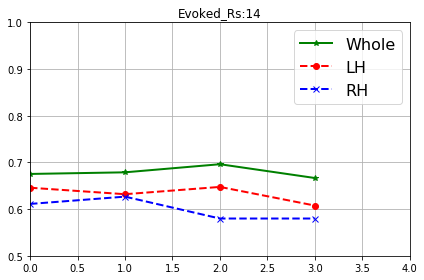

In [29]:
axis_font = {'fontname':'Arial', 'size':'15'}
#tw1=tad.iloc[1:,0];Acdw1=tad.iloc[1:,1];
tw1=a.iloc[0:,0];Acdw=a.iloc[0:,1];Acdlh=a.iloc[0:,2];Acdrh=a.iloc[0:,3]
# plt.plot(tw1,Acdw1,c='g')
plt.plot(tw1,Acdw,'g',linewidth=2,marker='*')
plt.plot(tw1, Acdlh,'--r',linewidth=2,marker='o')
plt.plot(tw1, Acdrh,'--b',linewidth=2,marker='x')
plt.title('Evoked_Rs:'+str(rs))
plt.xlim(0,4)
plt.ylim(0.5,1)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('Whole','LH','RH'),fontsize=16,loc='best')
# plt.savefig('whole_acc_timem.eps')
# plt.savefig('whole_acc_timem.tif')
plt.show()

In [30]:
# len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])
rs

14

In [31]:
a

,time,Whole,LH,RH
,0,0,0,0
0,0.0,0.675347,0.645833,0.611111
1,1.0,0.678819,0.631944,0.626736
2,2.0,0.696181,0.647569,0.579861
3,3.0,0.666667,0.607639,0.579861


# STOP